# Data Loading

In [ ]:
#import library

In [2]:
import pandas as pd
import string
import matplotlib.pyplot as plt

In [ ]:
#Data Loading

In [3]:
df = pd.read_csv(r'C:\Users\maari\OneDrive\Desktop\Data Cleaning and Exploration\sample_customer_feedback.csv')

In [4]:
df

,Customer_ID,Feedback_Date,Product_ID,Rating,Comments
0,1,2/16/2018,P001,1,Like start nearly grow add film.
1,2,4/13/2018,P002,4,Whom still case door certain century mean abil...
2,3,2/2/2018,P003,1,Follow new special beat address.
3,4,4/8/2018,P004,5,Development strong lose send certain say health.
4,5,2/22/2018,P005,3,Seem response quickly budget.
...,...,...,...,...,...
495,496,2/18/2018,P496,4,Court look town report mean.
496,497,5/5/2018,P497,3,Would position party story key.
497,498,6/24/2018,P498,4,And president sound key in force wish.
498,499,4/8/2018,P499,2,Where form fly.


# Data Cleaning

In [ ]:
#Missing Values

In [6]:
df.isnull().any() #There is no any missing values

Customer_ID      False
Feedback_Date    False
Product_ID       False
Rating           False
Comments         False
dtype: bool

In [73]:
#Data Types

In [7]:
df.dtypes

Customer_ID       int64
Feedback_Date    object
Product_ID       object
Rating            int64
Comments         object
dtype: object

In [5]:
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'], errors='coerce') #Feedback_Date datatype convert into datetime
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') #Rating is already in int
df['Comments'] = df['Comments'].astype(str) #Comments are already in str

In [6]:
df.dtypes

Customer_ID               int64
Feedback_Date    datetime64[ns]
Product_ID               object
Rating                    int64
Comments                 object
dtype: object

In [ ]:
#Duplicates 

In [37]:
df.duplicated() #There is no any duplicates in this file

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [ ]:
#Text Processing

In [7]:
# Function to clean and tokenize the text
def Text_Processing(text):
    # Remove extra whitespace
    text = " ".join(text.split()) #There is no extra whitespace in the comments
    text = text.lower() # Convert text to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation)) #Remove punctuation
    tokens = text.split() #Tokenize the comments
    return tokens

#Cleaned_Comments after Text Processing
df['Cleaned_Comments'] = df['Comments'].apply(lambda x: Text_Processing(x))
df

,Customer_ID,Feedback_Date,Product_ID,Rating,Comments,Cleaned_Comments
0,1,2018-02-16,P001,1,Like start nearly grow add film.,"[like, start, nearly, grow, add, film]"
1,2,2018-04-13,P002,4,Whom still case door certain century mean abil...,"[whom, still, case, door, certain, century, me..."
2,3,2018-02-02,P003,1,Follow new special beat address.,"[follow, new, special, beat, address]"
3,4,2018-04-08,P004,5,Development strong lose send certain say health.,"[development, strong, lose, send, certain, say..."
4,5,2018-02-22,P005,3,Seem response quickly budget.,"[seem, response, quickly, budget]"
...,...,...,...,...,...,...
495,496,2018-02-18,P496,4,Court look town report mean.,"[court, look, town, report, mean]"
496,497,2018-05-05,P497,3,Would position party story key.,"[would, position, party, story, key]"
497,498,2018-06-24,P498,4,And president sound key in force wish.,"[and, president, sound, key, in, force, wish]"
498,499,2018-04-08,P499,2,Where form fly.,"[where, form, fly]"


# Exploratory Data Analysis

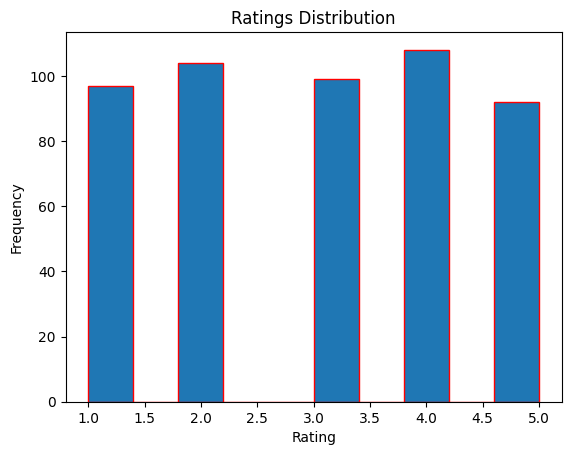

Average Rating: 2.99


In [8]:
# Plot the distribution of ratings (Histogram)
plt.hist(df['Rating'], bins=10, edgecolor="red")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Calculate the average rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

In [9]:
new_column_data = df['Cleaned_Comments']
print(new_column_data)
count = 0
words = []
max_count = 0
#Logic to check the most frequently occurring words in the Comments column
for line in new_column_data:
    for text in line:
        words.append(text)
for i in range(0,len(words)):
    count=1
    for j in range(i+1,len(words)):
        if(words[i]==words[j]):
            count = count+1
    if(count>max_count):
        max_count = count
        word = words[i]
print("Most Frequent Word: "+word)


0                 [like, start, nearly, grow, add, film]
1      [whom, still, case, door, certain, century, me...
2                  [follow, new, special, beat, address]
3      [development, strong, lose, send, certain, say...
4                      [seem, response, quickly, budget]
                             ...                        
495                    [court, look, town, report, mean]
496                 [would, position, party, story, key]
497        [and, president, sound, key, in, force, wish]
498                                   [where, form, fly]
499                           [much, power, south, name]
Name: Cleaned_Comments, Length: 500, dtype: object
Most Frequent Word: camera


In [1]:
#Trend Analysis

In [10]:
df.set_index('Feedback_Date', inplace=True)

# Resample the data by month and calculate the average rating
monthly_avg_rating = df['Rating'].resample('ME').mean()

# Resample the data by year and calculate the average rating
yearly_avg_rating = df['Rating'].resample('YE').mean()

# Display the first few rows of the resampled data (optional)
monthly_avg_rating
yearly_avg_rating

Feedback_Date
2018-12-31    2.987903
Name: Rating, dtype: float64

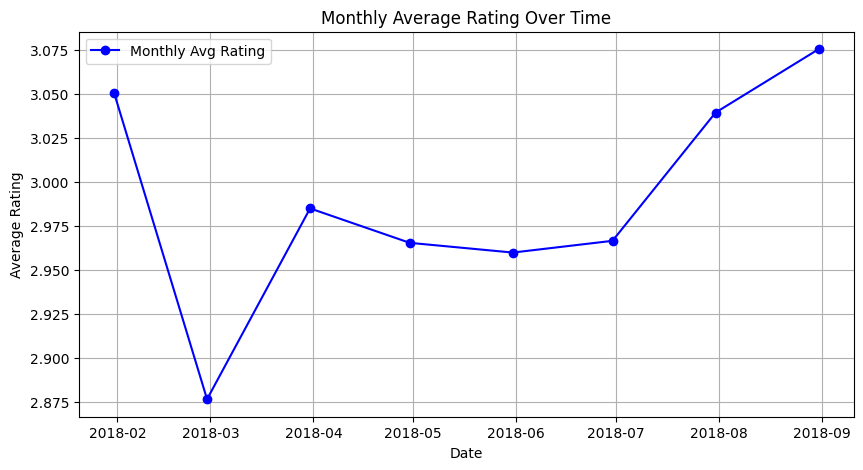

In [11]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.plot(monthly_avg_rating, marker='o', linestyle='-', color='blue', label='Monthly Avg Rating')
plt.title('Monthly Average Rating Over Time')  # Add a title to the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Average Rating')  # Label for the y-axis
plt.legend()  # Add a legend to identify the line
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot

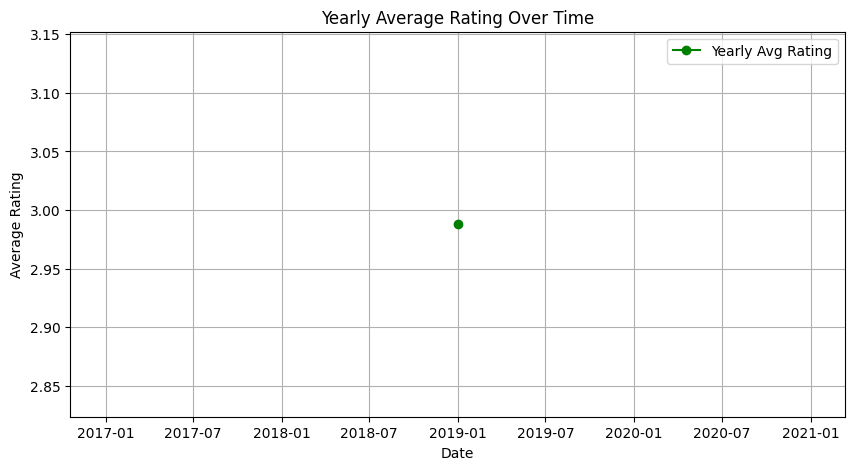

In [12]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.plot(yearly_avg_rating, marker='o', linestyle='-', color='green', label='Yearly Avg Rating')
plt.title('Yearly Average Rating Over Time')  # Add a title to the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Average Rating')  # Label for the y-axis
plt.legend()  # Add a legend to identify the line
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot

In [14]:
df.to_csv(r'C:\Users\maari\OneDrive\Desktop\Data Cleaning and Exploration\Cleaned_Dataset.csv')
df

,Customer_ID,Product_ID,Rating,Comments,Cleaned_Comments
Feedback_Date,,,,,
2018-02-16,1,P001,1,Like start nearly grow add film.,"[like, start, nearly, grow, add, film]"
2018-04-13,2,P002,4,Whom still case door certain century mean abil...,"[whom, still, case, door, certain, century, me..."
2018-02-02,3,P003,1,Follow new special beat address.,"[follow, new, special, beat, address]"
2018-04-08,4,P004,5,Development strong lose send certain say health.,"[development, strong, lose, send, certain, say..."
2018-02-22,5,P005,3,Seem response quickly budget.,"[seem, response, quickly, budget]"
...,...,...,...,...,...
2018-02-18,496,P496,4,Court look town report mean.,"[court, look, town, report, mean]"
2018-05-05,497,P497,3,Would position party story key.,"[would, position, party, story, key]"
2018-06-24,498,P498,4,And president sound key in force wish.,"[and, president, sound, key, in, force, wish]"
